In [1]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için  link

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek için

Saving hr.xlsx to hr.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [4]:
hr=pd.read_excel('hr.xlsx')

#EDA

In [5]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1205 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [150]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1205.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6523.930290,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4756.215086,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8237.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.504376,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.009597,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.009285,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.095758,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.015974,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.005332,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.010333,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.019477,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.951287,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [8]:
hr.corr().MonthlyIncome.sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.951287
TotalWorkingYears           0.780438
YearsAtCompany              0.527649
Age                         0.504376
YearsInCurrentRole          0.365401
YearsWithCurrManager        0.357689
YearsSinceLastPromotion     0.350071
NumCompaniesWorked          0.138344
Education                   0.095758
RelationshipSatisfaction    0.035059
MonthlyRate                 0.023419
WorkLifeBalance             0.020497
DailyRate                   0.009597
StockOptionLevel           -0.002759
EnvironmentSatisfaction    -0.005332
TrainingTimesLastYear      -0.006785
DistanceFromHome           -0.009285
HourlyRate                 -0.010333
PerformanceRating          -0.012966
JobSatisfaction            -0.013752
EmployeeNumber             -0.015974
JobInvolvement             -0.019477
PercentSalaryHike          -0.023454
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

In [9]:
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

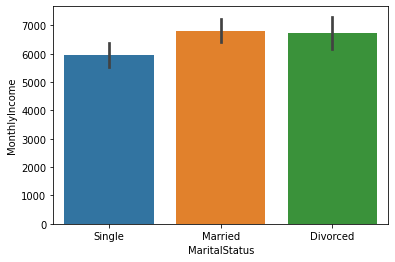

In [10]:
sns.barplot(x=hr['MaritalStatus'],y=hr['MonthlyIncome'])

# evlilik durumuna göre maaşlarda değişiklik oluyor.

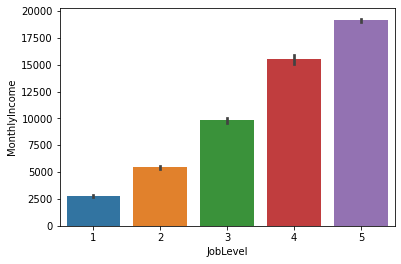

In [11]:
sns.barplot(x=hr['JobLevel'],y=hr['MonthlyIncome'])

# beklendiği gibi iş seviyesine göre maaş değişikliği.

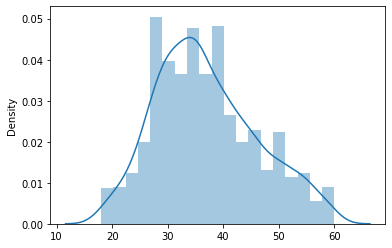

In [12]:
sns.distplot(x=hr['Age'])

# çalışanların yaş dağılımı

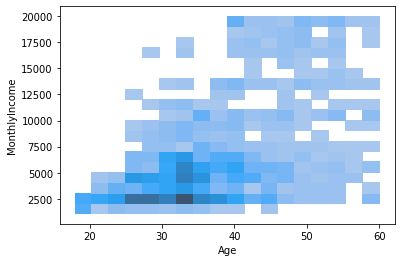

In [13]:
sns.histplot(x=hr['Age'],y=hr['MonthlyIncome'])

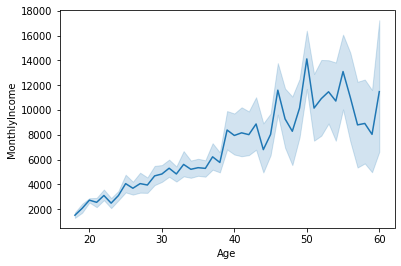

In [14]:
sns.lineplot(x=hr['Age'],y=hr['MonthlyIncome'])

# yaşa göre maaş değişimleri

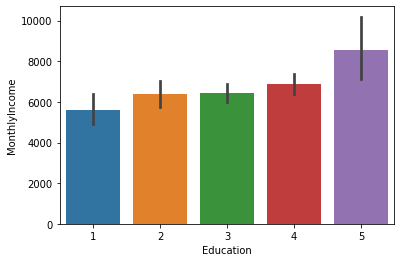

In [15]:
sns.barplot(x=hr['Education'],y=hr['MonthlyIncome'])

# çalışanların eğitim durumuna göre maşş dağılımı.

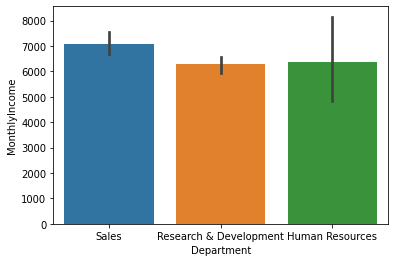

In [16]:
sns.barplot(x=hr['Department'],y=hr['MonthlyIncome'])

# depeatmanlara göre maaş durumu

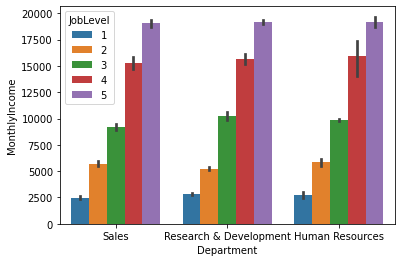

In [17]:
sns.barplot(x=hr['Department'],y=hr['MonthlyIncome'],hue=hr['JobLevel'])

# depeatmanlara ve o departmandaki çalışanların eğitim durumuna göre göre ort maaş durumu

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

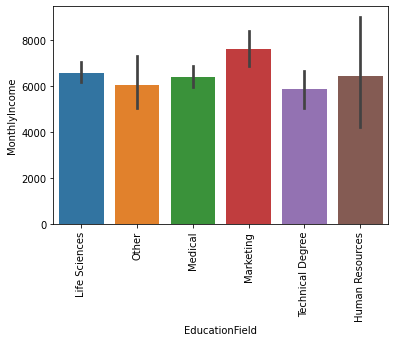

In [18]:
sns.barplot(x=hr['EducationField'],y=hr['MonthlyIncome'])
plt.xticks(rotation=90)

#Regression

In [19]:
miss=hr.isnull().sum()
miss[miss>0]
#attrition eleman işten ayrılıp ayrılmayacak mı ona bakıyoruz
#ayrılacaksa ve bizde o elemanı tutmak istiyorsak çalışma şartlarını iyileştiriyoruz

Attrition        265
MonthlyIncome    265
dtype: int64

In [20]:
data=hr.copy()
del data['Attrition']
# Attrition u siliyoruz ki boş verilerle sorun olmasın şimdilik

In [21]:
data.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               265
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [131]:
missing=data[data['MonthlyIncome'].isnull()]#boş
filled=data[data['MonthlyIncome'].notnull()]#dolu
#MonthlyIncome  boş ve dolu sütunları ayırdım

In [23]:
missing.shape,filled.shape

((265, 34), (1205, 34))

In [24]:
filled.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.017555,0.003074,0.215022,NaN,-0.030078,0.017511,0.010490,0.026380,0.524683,-0.002142,0.504376,0.030861,0.281257,-0.007668,-0.017728,0.054784,NaN,0.007166,0.678289,-0.007230,-0.032737,0.323413,0.209129,0.221807,0.214771
DailyRate,0.017555,1.000000,0.005963,-0.014068,NaN,-0.047483,0.035487,0.015392,0.027986,0.002527,0.024612,0.009597,-0.034968,0.038203,0.029811,0.000068,-0.010120,NaN,0.052685,0.005077,-0.019137,-0.058334,-0.043150,0.010441,-0.034099,-0.028570
DistanceFromHome,0.003074,0.005963,1.000000,0.035379,NaN,0.020763,-0.030170,0.027519,0.033623,0.006032,-0.005838,-0.009285,0.045875,-0.016143,0.039423,0.028285,0.013337,NaN,0.062579,0.017436,-0.033804,-0.016886,0.007022,0.023506,0.014140,0.014597
Education,0.215022,-0.014068,0.035379,1.000000,NaN,0.045023,-0.024908,-0.006329,0.066902,0.103864,-0.014474,0.095758,-0.029582,0.125083,-0.019455,-0.029513,-0.015992,NaN,-0.004353,0.157465,-0.016219,0.012274,0.079556,0.067478,0.062813,0.081593
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.030078,-0.047483,0.020763,0.045023,NaN,1.000000,0.028064,-0.004309,0.006398,-0.019065,-0.041587,-0.015974,0.008877,-0.017408,-0.024460,-0.046639,-0.085285,NaN,0.044376,-0.022418,0.016559,0.014841,-0.010650,-0.011192,-0.003753,-0.012552
EnvironmentSatisfaction,0.017511,0.035487,-0.030170,-0.024908,NaN,0.028064,1.000000,-0.046590,-0.013060,-0.003212,0.000359,-0.005332,0.031333,0.006870,-0.046696,-0.041666,-0.001946,NaN,0.003917,-0.004758,-0.015246,0.036916,0.000836,0.023155,0.016795,-0.010579
HourlyRate,0.010490,0.015392,0.027519,-0.006329,NaN,-0.004309,-0.046590,1.000000,0.041263,-0.019858,-0.058157,-0.010333,-0.026831,0.026877,-0.002272,0.007760,-0.001814,NaN,0.038181,-0.008770,-0.010727,-0.004388,-0.032050,-0.041045,-0.033828,-0.034277
JobInvolvement,0.026380,0.027986,0.033623,0.066902,NaN,0.006398,-0.013060,0.041263,1.000000,-0.014145,-0.017064,-0.019477,-0.026837,0.019130,-0.005307,-0.019707,0.027719,NaN,0.039984,-0.003143,-0.019101,-0.015039,-0.011509,0.014308,-0.008718,0.034495
JobLevel,0.524683,0.002527,0.006032,0.103864,NaN,-0.019065,-0.003212,-0.019858,-0.014145,1.000000,-0.013625,0.951287,0.031863,0.135199,-0.029989,-0.022727,0.035728,NaN,0.001562,0.791560,-0.003407,0.033094,0.547500,0.390848,0.364095,0.388201


In [25]:
abs(filled.corr()['MonthlyIncome'].sort_values(ascending=False))

MonthlyIncome               1.000000
JobLevel                    0.951287
TotalWorkingYears           0.780438
YearsAtCompany              0.527649
Age                         0.504376
YearsInCurrentRole          0.365401
YearsWithCurrManager        0.357689
YearsSinceLastPromotion     0.350071
NumCompaniesWorked          0.138344
Education                   0.095758
RelationshipSatisfaction    0.035059
MonthlyRate                 0.023419
WorkLifeBalance             0.020497
DailyRate                   0.009597
StockOptionLevel            0.002759
EnvironmentSatisfaction     0.005332
TrainingTimesLastYear       0.006785
DistanceFromHome            0.009285
HourlyRate                  0.010333
PerformanceRating           0.012966
JobSatisfaction             0.013752
EmployeeNumber              0.015974
JobInvolvement              0.019477
PercentSalaryHike           0.023454
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

In [26]:
#TotalWorkingYears %70 bağlı olduğu için acaba tek sütunla bulunabilir mi ?
from scipy import stats
est=stats.linregress(x=filled['TotalWorkingYears'],y=filled['MonthlyIncome'])

In [27]:
est

LinregressResult(slope=472.6981466032999, intercept=1187.737022203578, rvalue=0.7804379598380539, pvalue=1.2815494054484267e-247, stderr=10.91829318795265)

In [28]:
est.slope

472.6981466032999

In [29]:
est.intercept
# intercept y yi kestiği yer
# mx+b deki b değeri min maaş


1187.737022203578

In [30]:
#predict in arkasında bu işlem yapılıyor
def predict(x):
    return est.slope * x + est.intercept#mx+b

In [31]:
predict(2)

2133.1333154101776

In [32]:
r2_score(filled['MonthlyIncome'],predict(filled.TotalWorkingYears))

0.6090834091561835

In [33]:
mean_squared_error(filled['MonthlyIncome'],filled['TotalWorkingYears'].apply(predict))**.5

2972.5095419789172

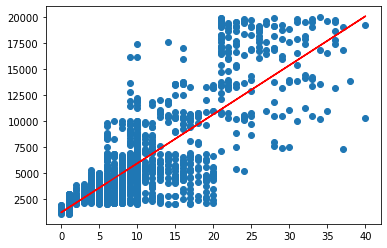

In [34]:
#maviler gerçek değerler bizim tahmin ettiklerimiz kırmızı
plt.scatter(filled['TotalWorkingYears'],filled['MonthlyIncome'])
plt.plot(filled.TotalWorkingYears,predict(filled.TotalWorkingYears),c='r');

Multi-Variable Regression

In [35]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1205 non-null   int64  
 1   BusinessTravel            1205 non-null   object 
 2   DailyRate                 1205 non-null   int64  
 3   Department                1205 non-null   object 
 4   DistanceFromHome          1205 non-null   int64  
 5   Education                 1205 non-null   int64  
 6   EducationField            1205 non-null   object 
 7   EmployeeCount             1205 non-null   int64  
 8   EmployeeNumber            1205 non-null   int64  
 9   EnvironmentSatisfaction   1205 non-null   int64  
 10  Gender                    1205 non-null   object 
 11  HourlyRate                1205 non-null   int64  
 12  JobInvolvement            1205 non-null   int64  
 13  JobLevel                  1205 non-null   int64  
 14  JobRole 

In [36]:
# dummie variabl için yazı olan sütunları ayırıyoruz
filled.select_dtypes(exclude='number').head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [37]:
filled.select_dtypes(exclude='object').head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
filled.select_dtypes(exclude='number').nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [138]:
x=pd.get_dummies(filled,drop_first=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1205 non-null   int64  
 1   DailyRate                          1205 non-null   int64  
 2   DistanceFromHome                   1205 non-null   int64  
 3   Education                          1205 non-null   int64  
 4   EmployeeCount                      1205 non-null   int64  
 5   EmployeeNumber                     1205 non-null   int64  
 6   EnvironmentSatisfaction            1205 non-null   int64  
 7   HourlyRate                         1205 non-null   int64  
 8   JobInvolvement                     1205 non-null   int64  
 9   JobLevel                           1205 non-null   int64  
 10  JobSatisfaction                    1205 non-null   int64  
 11  MonthlyIncome                      1205 non-null   float

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
scaler=StandardScaler()

In [140]:
def models(x,y):
  L=LinearRegression()
  R=Ridge()
  La=Lasso()
  etr=ExtraTreeRegressor()
  GBR=GradientBoostingRegressor()
  est=KNeighborsRegressor(n_neighbors=10,weights='uniform')
  xgb=XGBRegressor()
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=17)
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  mod=[L,R,La,etr,GBR,est,xgb]
  mod_names=['LinearReg','Ridge','Lasso','ExtraTreeReg','GradientBoostingReg','KNeighborsReg','XGBReg']
  r2=[]
  mean_squared=[]
  for m in mod:
    model=m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    r2.append(r2_score(y_test,y_pred))
    mean_squared.append(mean_squared_error(y_test,y_pred)**0.5)
  sonuc={'Models':mod_names,'r2_socer':r2,'Mean_Squared_score':mean_squared}
  sonuc_df=pd.DataFrame(sonuc)
  return sonuc_df,xgb,GBR


In [141]:
sonuc_df,xgb,gbr=models(x.drop('MonthlyIncome',axis=1),x.MonthlyIncome) # xgb ve GBR nin yüksek olduğunu görünce onları aldım

[10:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [142]:
sonuc_df

,Models,r2_socer,Mean_Squared_score
0,LinearReg,0.948530,1041.706815
1,Ridge,0.948456,1042.451352
2,Lasso,0.948732,1039.655205
3,ExtraTreeReg,0.871973,1642.926048
4,GradientBoostingReg,0.959418,924.986298
5,KNeighborsReg,0.838140,1847.299682
6,XGBReg,0.959992,918.412310


### Implementing the model

In [129]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 367 to 1465
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       265 non-null    int64 
 1   BusinessTravel            265 non-null    object
 2   DailyRate                 265 non-null    int64 
 3   Department                265 non-null    object
 4   DistanceFromHome          265 non-null    int64 
 5   Education                 265 non-null    int64 
 6   EducationField            265 non-null    object
 7   EmployeeCount             265 non-null    int64 
 8   EmployeeNumber            265 non-null    int64 
 9   EnvironmentSatisfaction   265 non-null    int64 
 10  Gender                    265 non-null    object
 11  HourlyRate                265 non-null    int64 
 12  JobInvolvement            265 non-null    int64 
 13  JobLevel                  265 non-null    int64 
 14  JobRole                

In [132]:
del missing['MonthlyIncome']

In [143]:
x=pd.get_dummies(missing,drop_first=True)


In [144]:
predictions=GBR.predict(x)
predictions

array([19146.66669334, 15031.87109822, 10095.9175641 , 11017.90049766,
       10983.38212014, 16082.44786731,  7564.53454706, 14270.08889528,
       19149.81235262, 15073.08947071, 10493.16379028, 15175.29441707,
       18661.53706782, 14148.52871479, 10751.9298348 , 10293.46734745,
       10276.04234374, 16813.32290998, 11207.56927507,  7654.79929987,
       14821.02408568,  8355.83674383, 15947.61587193, 18768.26964183,
       10263.71879607, 14512.16360175, 14601.16900362, 10625.47726994,
       14907.40732385,  9713.10880341, 15028.54648798,  7899.25262851,
       17959.67258188, 14367.16684666, 14757.4562418 , 15891.61074722,
       18775.21314574, 15853.30806903, 10265.77107554, 10562.44443208,
       10043.42107971,  8299.73934527, 10928.85211547, 14049.82876497,
       14387.0062308 ,  9768.76110271, 14805.69336353, 14148.20217856,
       11064.51115283,  7783.23403804, 18104.66933697, 15035.70066594,
       14926.73122518, 14387.0062308 , 15084.3229803 , 14958.28730876,
      

In [145]:
predictions.mean(),predictions.min(),predictions.max()

(13900.389275169611, 7524.75674883486, 19149.812352619552)

In [146]:
missing.loc[:,'MonthlyIncome']=predictions
#boş verileri doldurduk.

In [147]:
results=missing.append(filled).sort_values('EmployeeNumber')

In [148]:
results.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,5993.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,5130.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2090.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2909.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3468.0


In [149]:
result=pd.DataFrame(columns=['EmployeeNumber','MonthlyIncome'])
result['EmployeeNumber']=missing['EmployeeNumber']
result['MonthlyIncome']=predictions
result.head()

,EmployeeNumber,MonthlyIncome
367,491,19146.666693
368,492,15031.871098
369,493,10095.917564
370,494,11017.900498
371,495,10983.382120
